This file covers the monthly time-shifting of the data from the second Pioneer probe. We tried to come up with a mathematical equation for what the time-shift should be, but ultimately it was more effective to simply plot the data and then shift it based off of the visual difference between the lines on the plots. This approach becomes less effective as there are more differences in terms of distance, longitude, and latitude.

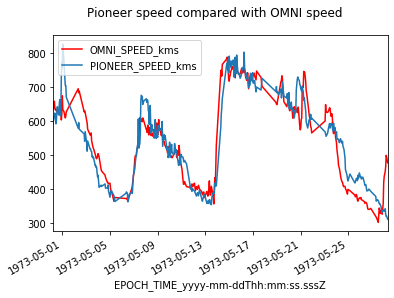

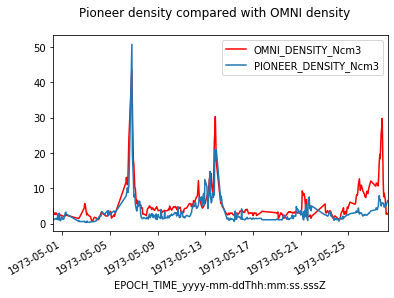

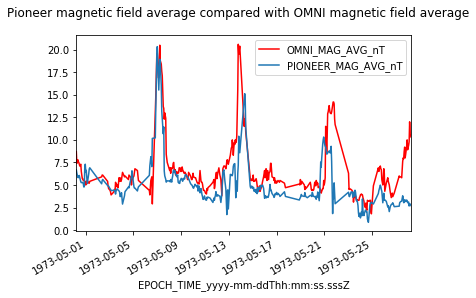

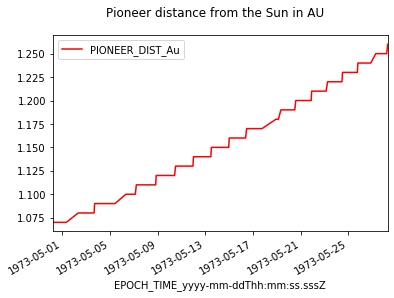

,OMNI_LAT_deg,OMNI_LONG_deg,OMNI_BR_nT,OMNI_BT_nT,OMNI_BN_nT,OMNI_MAG_AVG_nT,OMNI_SPEED_kms,OMNI_DENSITY_Ncm3,OMNI_TEMP_DegK,PIONEER_DIST_Au,PIONEER_LAT_deg,PIONEER_LONG_deg,PIONEER_BR_nT,PIONEER_BT_nT,PIONEER_BN_nT,PIONEER_MAG_AVG_nT,PIONEER_SPEED_kms,PIONEER_DENSITY_Ncm3,PIONEER_TEMP_DegK,Time_offset_hours
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.0
mean,-2.727926,157.778989,0.433245,0.002394,0.086170,6.682447,547.029255,5.273670,176414.622340,1.154122,-3.860904,166.424202,0.732855,-0.461522,-0.063283,5.112482,550.699734,3.290641,132441.473404,20.0
std,0.888650,7.600538,4.638280,3.978552,2.512119,3.300232,128.967145,5.140866,124914.294022,0.053763,0.653514,7.709736,2.939005,3.452840,2.220350,2.758932,130.765402,3.792804,113345.300035,0.0
min,-4.300000,144.200000,-15.700000,-15.500000,-9.800000,1.800000,303.000000,0.700000,14938.000000,1.070000,-5.000000,151.800000,-10.058800,-15.775400,-9.415700,0.857300,312.000000,0.388600,5638.000000,20.0
25%,-3.400000,152.000000,-3.000000,-1.825000,-1.300000,4.900000,415.750000,2.700000,67096.500000,1.110000,-4.400000,160.700000,-1.783500,-2.414500,-1.234175,3.702550,427.950000,1.398400,51416.000000,20.0
50%,-2.800000,157.200000,0.550000,0.550000,-0.100000,5.700000,560.000000,3.600000,155080.500000,1.150000,-3.900000,166.200000,1.107950,-0.157150,-0.141950,4.436950,558.100000,2.223100,104570.000000,20.0
75%,-2.000000,164.200000,4.100000,2.200000,1.400000,6.900000,639.000000,5.500000,259683.250000,1.200000,-3.300000,173.025000,2.933425,1.770125,0.975050,5.718475,657.225000,3.717175,172240.000000,20.0
max,-1.100000,171.100000,11.800000,12.800000,11.700000,20.600000,789.000000,43.600000,606944.000000,1.260000,-2.700000,179.200000,10.552000,9.964500,8.433000,20.342600,826.600000,50.749500,747642.000000,20.0


In [18]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Data From Pioneer 2 and OMNI 05/01/1973 to 06/01/1973")

df = pd.read_csv('csv files/Pioneer11.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.PIONEER_DIST_Au != -1.0E+31]
df = df[df.PIONEER_LAT_deg != -1.0E+31]
df = df[df.PIONEER_LONG_deg != -1.0E+31]
df = df[df.PIONEER_BR_nT != -1.0E+31]
df = df[df.PIONEER_BT_nT != -1.0E+31]
df = df[df.PIONEER_BN_nT != -1.0E+31]
df = df[df.PIONEER_MAG_AVG_nT != -1.0E+31]
df = df[df.PIONEER_SPEED_kms != -1.0E+31]
df = df[df.PIONEER_DENSITY_Ncm3 != -1.0E+31]
df = df[df.PIONEER_TEMP_DegK != -1.0E+31]

df2 = pd.read_csv('csv files/Omni4Pioneer11.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

df2 = df2[df2.OMNI_LAT_deg != -1.0E+31]
df2 = df2[df2.OMNI_LONG_deg != -1.0E+31]
df2 = df2[df2.OMNI_BR_nT != -1.0E+31]
df2 = df2[df2.OMNI_BT_nT != -1.0E+31]
df2 = df2[df2.OMNI_BN_nT != -1.0E+31]
df2 = df2[df2.OMNI_MAG_AVG_nT != -1.0E+31]
df2 = df2[df2.OMNI_SPEED_kms != -1.0E+31]
df2 = df2[df2.OMNI_DENSITY_Ncm3 != -1.0E+31]
df2 = df2[df2.OMNI_TEMP_DegK != -1.0E+31]

df['new_time'] = df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] - pd.Timedelta(hours = 20)
df['Time_offset_hours'] = 20

mF0 = pd.merge(df2, df, how='right', left_on='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', right_on='new_time')
mF0 = mF0.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

fig1 = plt.figure(1)
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_SPEED_kms', color='red', ax=ax)
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_SPEED_kms', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig2 = plt.figure(2)
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DENSITY_Ncm3', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig3 = plt.figure(3)
fig3.suptitle("Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_MAG_AVG_nT', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig4 = plt.figure(4)
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DIST_Au', color='red', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

plt.show()

mF0.describe()

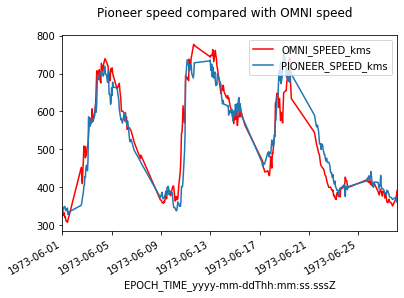

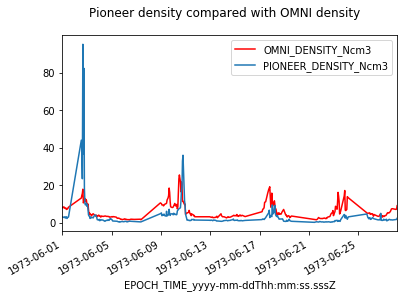

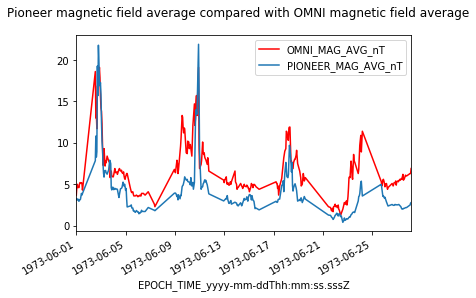

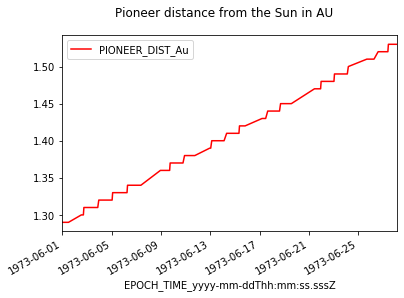

,OMNI_LAT_deg,OMNI_LONG_deg,OMNI_BR_nT,OMNI_BT_nT,OMNI_BN_nT,OMNI_MAG_AVG_nT,OMNI_SPEED_kms,OMNI_DENSITY_Ncm3,OMNI_TEMP_DegK,PIONEER_DIST_Au,PIONEER_LAT_deg,PIONEER_LONG_deg,PIONEER_BR_nT,PIONEER_BT_nT,PIONEER_BN_nT,PIONEER_MAG_AVG_nT,PIONEER_SPEED_kms,PIONEER_DENSITY_Ncm3,PIONEER_TEMP_DegK,Time_offset_hours
count,305.000000,305.000000,305.00000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.0
mean,0.888197,187.056721,0.47082,-0.951803,0.170492,6.649836,524.350820,6.123607,186022.708197,1.404426,-1.425574,191.692787,-0.086918,-0.538049,0.430186,4.225808,521.388852,3.717326,122881.344262,35.0
std,0.972817,7.748622,4.06730,4.043327,2.739258,3.374012,135.202449,4.345737,131013.563490,0.072881,0.569050,5.327234,2.987686,3.331735,1.557139,3.448755,127.284307,8.766880,117835.760201,0.0
min,-0.700000,174.600000,-9.70000,-12.900000,-9.300000,1.300000,308.000000,1.600000,20000.000000,1.290000,-2.400000,182.700000,-13.582400,-20.682200,-5.332100,0.413900,328.900000,0.232400,8543.000000,35.0
25%,-0.100000,179.500000,-2.90000,-3.700000,-1.100000,4.700000,395.000000,3.200000,65018.000000,1.330000,-2.000000,186.500000,-1.663600,-2.012400,-0.422800,2.385800,398.600000,1.020000,48409.000000,35.0
50%,0.900000,186.900000,1.30000,-0.800000,-0.100000,5.800000,508.000000,4.500000,148129.000000,1.400000,-1.400000,191.900000,-0.155600,-0.121400,0.418400,3.272600,511.400000,1.568700,89846.000000,35.0
75%,1.800000,194.600000,3.10000,1.700000,1.300000,7.900000,647.000000,8.100000,282930.000000,1.480000,-0.900000,196.900000,2.001900,0.837400,1.160900,4.938900,630.800000,3.206300,159141.000000,35.0
max,2.500000,200.400000,12.80000,10.900000,11.700000,19.100000,777.000000,25.500000,676869.000000,1.530000,-0.500000,200.400000,7.871600,12.305300,9.164500,21.882900,758.800000,95.146100,971486.000000,35.0


In [19]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Data From Pioneer 2 and OMNI 06/01/1973 to 07/01/1973")

df = pd.read_csv('csv files/Pioneer12.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.PIONEER_DIST_Au != -1.0E+31]
df = df[df.PIONEER_LAT_deg != -1.0E+31]
df = df[df.PIONEER_LONG_deg != -1.0E+31]
df = df[df.PIONEER_BR_nT != -1.0E+31]
df = df[df.PIONEER_BT_nT != -1.0E+31]
df = df[df.PIONEER_BN_nT != -1.0E+31]
df = df[df.PIONEER_MAG_AVG_nT != -1.0E+31]
df = df[df.PIONEER_SPEED_kms != -1.0E+31]
df = df[df.PIONEER_DENSITY_Ncm3 != -1.0E+31]
df = df[df.PIONEER_TEMP_DegK != -1.0E+31]

df2 = pd.read_csv('csv files/Omni4Pioneer12.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

df2 = df2[df2.OMNI_LAT_deg != -1.0E+31]
df2 = df2[df2.OMNI_LONG_deg != -1.0E+31]
df2 = df2[df2.OMNI_BR_nT != -1.0E+31]
df2 = df2[df2.OMNI_BT_nT != -1.0E+31]
df2 = df2[df2.OMNI_BN_nT != -1.0E+31]
df2 = df2[df2.OMNI_MAG_AVG_nT != -1.0E+31]
df2 = df2[df2.OMNI_SPEED_kms != -1.0E+31]
df2 = df2[df2.OMNI_DENSITY_Ncm3 != -1.0E+31]
df2 = df2[df2.OMNI_TEMP_DegK != -1.0E+31]

df['new_time'] = df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] - pd.Timedelta(hours = 35)
df['Time_offset_hours'] = 35

mF1 = pd.merge(df2, df, how='right', left_on='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', right_on='new_time')
mF1 = mF1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

fig1 = plt.figure(1)
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF1.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_SPEED_kms', color='red', ax=ax)
mF1.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_SPEED_kms', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig2 = plt.figure(2)
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF1.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF1.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DENSITY_Ncm3', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig3 = plt.figure(3)
fig3.suptitle("Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF1.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF1.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_MAG_AVG_nT', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig4 = plt.figure(4)
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF1.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DIST_Au', color='red', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

plt.show()

mF1.describe()

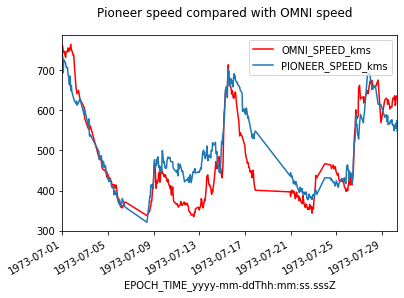

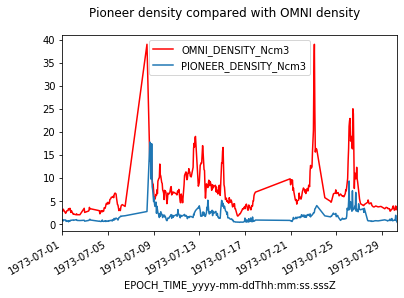

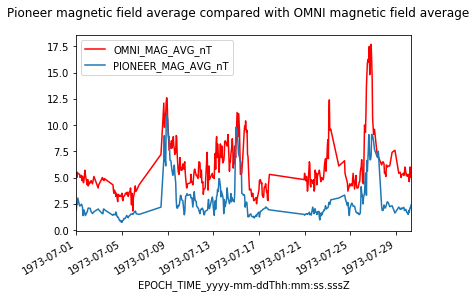

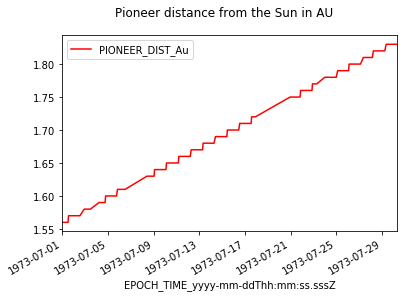

,OMNI_LAT_deg,OMNI_LONG_deg,OMNI_BR_nT,OMNI_BT_nT,OMNI_BN_nT,OMNI_MAG_AVG_nT,OMNI_SPEED_kms,OMNI_DENSITY_Ncm3,OMNI_TEMP_DegK,PIONEER_DIST_Au,PIONEER_LAT_deg,PIONEER_LONG_deg,PIONEER_BR_nT,PIONEER_BT_nT,PIONEER_BN_nT,PIONEER_MAG_AVG_nT,PIONEER_SPEED_kms,PIONEER_DENSITY_Ncm3,PIONEER_TEMP_DegK,Time_offset_hours
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.00000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.0
mean,4.343750,217.077083,0.028646,0.341406,-0.176042,6.049219,475.78125,7.289323,155380.739583,1.697578,0.447656,208.976562,-0.270130,0.229684,-0.091641,2.845309,499.799740,1.884672,85805.437500,40.0
std,0.793224,7.918989,4.100858,3.476760,2.039851,2.681802,116.31702,5.048337,115952.306149,0.077924,0.406532,3.711294,1.946504,2.214774,1.101045,2.036287,95.931279,1.994473,70294.615899,0.0
min,2.900000,203.100000,-9.800000,-13.700000,-7.700000,1.800000,335.00000,1.700000,33335.000000,1.560000,-0.300000,202.000000,-6.969300,-7.793300,-4.937900,0.726700,321.200000,0.349100,7593.000000,40.0
25%,3.800000,211.300000,-3.300000,-1.800000,-1.300000,4.400000,385.75000,3.900000,74096.000000,1.640000,0.200000,206.375000,-1.663950,-0.859300,-0.457825,1.652800,425.475000,0.774250,37558.000000,40.0
50%,4.300000,216.300000,0.500000,0.300000,-0.100000,5.300000,433.50000,6.250000,108465.500000,1.690000,0.400000,208.800000,-0.227050,0.226200,-0.014400,2.100300,469.550000,1.452450,70524.500000,40.0
75%,5.000000,223.800000,3.000000,2.625000,1.000000,6.900000,575.00000,8.500000,199194.250000,1.760000,0.800000,212.200000,1.116975,1.156225,0.456450,3.078950,567.275000,2.175725,105227.250000,40.0
max,5.600000,231.000000,11.900000,10.500000,6.900000,17.700000,764.00000,39.000000,539541.000000,1.830000,1.100000,215.200000,5.961400,8.689500,4.224600,10.942400,743.500000,17.779500,492197.000000,40.0


In [20]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Data From Pioneer 2 and OMNI 07/01/1973 to 08/01/1973")

df = pd.read_csv('csv files/Pioneer13.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.PIONEER_DIST_Au != -1.0E+31]
df = df[df.PIONEER_LAT_deg != -1.0E+31]
df = df[df.PIONEER_LONG_deg != -1.0E+31]
df = df[df.PIONEER_BR_nT != -1.0E+31]
df = df[df.PIONEER_BT_nT != -1.0E+31]
df = df[df.PIONEER_BN_nT != -1.0E+31]
df = df[df.PIONEER_MAG_AVG_nT != -1.0E+31]
df = df[df.PIONEER_SPEED_kms != -1.0E+31]
df = df[df.PIONEER_DENSITY_Ncm3 != -1.0E+31]
df = df[df.PIONEER_TEMP_DegK != -1.0E+31]

df2 = pd.read_csv('csv files/Omni4Pioneer13.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

df2 = df2[df2.OMNI_LAT_deg != -1.0E+31]
df2 = df2[df2.OMNI_LONG_deg != -1.0E+31]
df2 = df2[df2.OMNI_BR_nT != -1.0E+31]
df2 = df2[df2.OMNI_BT_nT != -1.0E+31]
df2 = df2[df2.OMNI_BN_nT != -1.0E+31]
df2 = df2[df2.OMNI_MAG_AVG_nT != -1.0E+31]
df2 = df2[df2.OMNI_SPEED_kms != -1.0E+31]
df2 = df2[df2.OMNI_DENSITY_Ncm3 != -1.0E+31]
df2 = df2[df2.OMNI_TEMP_DegK != -1.0E+31]

df['new_time'] = df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] - pd.Timedelta(hours = 40)
df['Time_offset_hours'] = 40

mF2 = pd.merge(df2, df, how='right', left_on='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', right_on='new_time')
mF2 = mF2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

fig1 = plt.figure(1)
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF2.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_SPEED_kms', color='red', ax=ax)
mF2.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_SPEED_kms', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig2 = plt.figure(2)
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF2.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF2.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DENSITY_Ncm3', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig3 = plt.figure(3)
fig3.suptitle("Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF2.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF2.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_MAG_AVG_nT', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig4 = plt.figure(4)
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF2.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DIST_Au', color='red', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

plt.show()

mF2.describe()

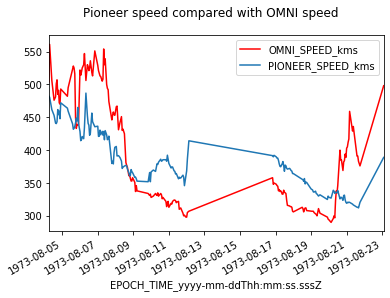

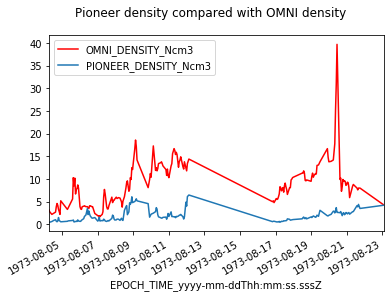

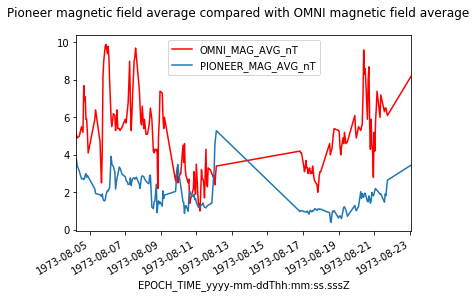

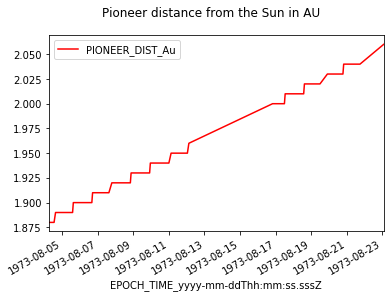

,OMNI_LAT_deg,OMNI_LONG_deg,OMNI_BR_nT,OMNI_BT_nT,OMNI_BN_nT,OMNI_MAG_AVG_nT,OMNI_SPEED_kms,OMNI_DENSITY_Ncm3,OMNI_TEMP_DegK,PIONEER_DIST_Au,PIONEER_LAT_deg,PIONEER_LONG_deg,PIONEER_BR_nT,PIONEER_BT_nT,PIONEER_BN_nT,PIONEER_MAG_AVG_nT,PIONEER_SPEED_kms,PIONEER_DENSITY_Ncm3,PIONEER_TEMP_DegK,Time_offset_hours
count,190.000000,190.000000,190.00000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.00000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.0
mean,6.476316,243.710000,0.18000,-0.566316,-0.013684,4.983684,391.136842,9.138947,104028.373684,1.95900,1.623158,219.906842,0.059883,0.004600,0.073921,1.873910,381.687368,1.872197,32315.294737,45.0
std,0.307262,5.568359,3.41167,2.924468,1.815081,2.033944,82.678649,5.341042,96900.228069,0.05312,0.204682,1.920732,1.101754,1.386658,0.767761,0.844478,42.267864,1.289243,25929.222485,0.0
min,6.000000,235.700000,-6.10000,-8.900000,-7.300000,1.000000,290.000000,1.700000,16364.000000,1.88000,1.300000,217.100000,-3.823600,-2.747600,-3.247500,0.391000,312.000000,0.433900,5051.000000,45.0
25%,6.200000,238.800000,-2.70000,-2.500000,-0.975000,3.225000,321.250000,5.225000,27461.750000,1.91000,1.400000,218.200000,-0.625325,-1.165125,-0.366125,1.196100,352.575000,0.857975,13084.000000,45.0
50%,6.400000,242.150000,-0.25000,-0.600000,0.000000,5.100000,353.000000,8.500000,41485.500000,1.94000,1.600000,219.400000,0.048500,0.398200,0.002750,1.762700,375.000000,1.587000,20180.000000,45.0
75%,6.800000,249.500000,2.47500,1.575000,1.000000,6.000000,469.250000,12.050000,156941.250000,2.01000,1.800000,221.900000,0.666750,0.920150,0.404550,2.546150,417.025000,2.422275,49081.000000,45.0
max,7.000000,253.900000,8.40000,7.300000,6.700000,9.900000,561.000000,39.700000,404694.000000,2.06000,2.000000,223.300000,3.168800,3.059500,2.911200,5.287800,486.800000,6.471600,116060.000000,45.0


In [21]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Data From Pioneer 2 and OMNI 08/01/1973 to 09/01/1973")

df = pd.read_csv('csv files/Pioneer14.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.PIONEER_DIST_Au != -1.0E+31]
df = df[df.PIONEER_LAT_deg != -1.0E+31]
df = df[df.PIONEER_LONG_deg != -1.0E+31]
df = df[df.PIONEER_BR_nT != -1.0E+31]
df = df[df.PIONEER_BT_nT != -1.0E+31]
df = df[df.PIONEER_BN_nT != -1.0E+31]
df = df[df.PIONEER_MAG_AVG_nT != -1.0E+31]
df = df[df.PIONEER_SPEED_kms != -1.0E+31]
df = df[df.PIONEER_DENSITY_Ncm3 != -1.0E+31]
df = df[df.PIONEER_TEMP_DegK != -1.0E+31]

df2 = pd.read_csv('csv files/Omni4Pioneer14.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

df2 = df2[df2.OMNI_LAT_deg != -1.0E+31]
df2 = df2[df2.OMNI_LONG_deg != -1.0E+31]
df2 = df2[df2.OMNI_BR_nT != -1.0E+31]
df2 = df2[df2.OMNI_BT_nT != -1.0E+31]
df2 = df2[df2.OMNI_BN_nT != -1.0E+31]
df2 = df2[df2.OMNI_MAG_AVG_nT != -1.0E+31]
df2 = df2[df2.OMNI_SPEED_kms != -1.0E+31]
df2 = df2[df2.OMNI_DENSITY_Ncm3 != -1.0E+31]
df2 = df2[df2.OMNI_TEMP_DegK != -1.0E+31]

df['new_time'] = df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] - pd.Timedelta(hours = 45)
df['Time_offset_hours'] = 45

mF3 = pd.merge(df2, df, how='right', left_on='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', right_on='new_time')
mF3 = mF3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

fig1 = plt.figure(1)
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF3.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_SPEED_kms', color='red', ax=ax)
mF3.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_SPEED_kms', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig2 = plt.figure(2)
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF3.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF3.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DENSITY_Ncm3', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig3 = plt.figure(3)
fig3.suptitle("Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF3.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF3.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_MAG_AVG_nT', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig4 = plt.figure(4)
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF3.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DIST_Au', color='red', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

plt.show()

mF3.describe()

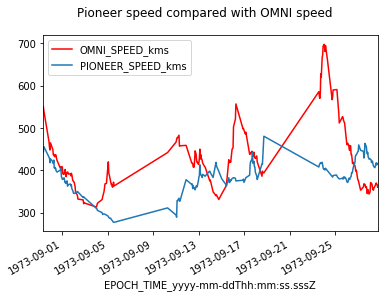

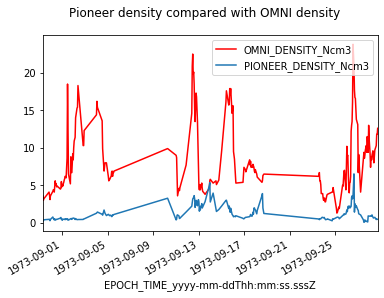

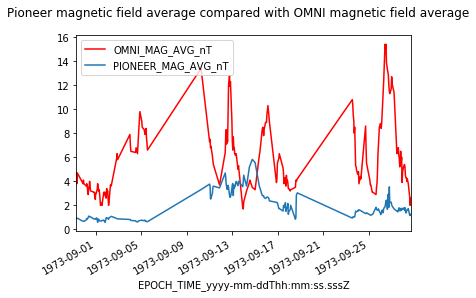

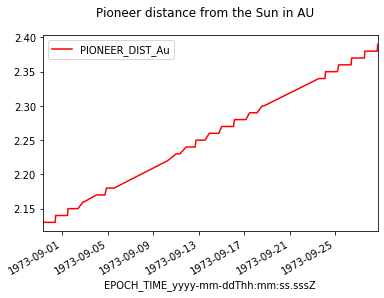

,OMNI_LAT_deg,OMNI_LONG_deg,OMNI_BR_nT,OMNI_BT_nT,OMNI_BN_nT,OMNI_MAG_AVG_nT,OMNI_SPEED_kms,OMNI_DENSITY_Ncm3,OMNI_TEMP_DegK,PIONEER_DIST_Au,PIONEER_LAT_deg,PIONEER_LONG_deg,PIONEER_BR_nT,PIONEER_BT_nT,PIONEER_BN_nT,PIONEER_MAG_AVG_nT,PIONEER_SPEED_kms,PIONEER_DENSITY_Ncm3,PIONEER_TEMP_DegK,Time_offset_hours
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.0
mean,7.096507,276.355022,1.527074,-0.563319,0.099563,6.134061,432.602620,8.329694,98274.799127,2.264978,2.626638,229.670306,-0.262068,-0.054707,-0.240932,1.837552,384.427948,1.263426,28063.742358,55.0
std,0.141067,9.834688,3.762204,3.615580,3.273746,3.127506,82.938384,4.568935,89137.577167,0.088440,0.245374,2.530497,0.995204,1.418095,0.999420,1.102838,41.837565,1.030817,22829.958791,0.0
min,6.800000,260.900000,-8.100000,-9.700000,-10.800000,1.700000,313.000000,1.300000,10959.000000,2.130000,2.200000,225.600000,-3.276800,-4.573600,-4.200100,0.589200,277.000000,0.068200,3973.000000,55.0
25%,6.900000,266.200000,-0.900000,-2.700000,-1.400000,3.700000,372.000000,5.100000,35358.000000,2.170000,2.400000,227.100000,-0.864600,-0.928800,-0.564500,0.941600,366.400000,0.524100,15304.000000,55.0
50%,7.200000,276.900000,1.600000,-0.400000,0.000000,5.400000,418.000000,6.800000,69165.000000,2.270000,2.600000,229.900000,-0.102400,-0.353600,0.013800,1.556900,384.700000,0.916300,20384.000000,55.0
75%,7.200000,286.700000,3.300000,1.300000,1.500000,8.100000,458.000000,10.200000,127808.000000,2.360000,2.900000,232.300000,0.535700,1.012400,0.334800,2.528300,414.600000,1.773400,33754.000000,55.0
max,7.200000,289.800000,12.100000,8.300000,11.700000,15.400000,698.000000,23.800000,569656.000000,2.390000,3.000000,233.000000,2.123800,4.079700,1.910600,5.824300,480.600000,6.525700,149914.000000,55.0


In [22]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Data From Pioneer 2 and OMNI 09/01/1973 to 10/01/1973")

df = pd.read_csv('csv files/Pioneer15.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.PIONEER_DIST_Au != -1.0E+31]
df = df[df.PIONEER_LAT_deg != -1.0E+31]
df = df[df.PIONEER_LONG_deg != -1.0E+31]
df = df[df.PIONEER_BR_nT != -1.0E+31]
df = df[df.PIONEER_BT_nT != -1.0E+31]
df = df[df.PIONEER_BN_nT != -1.0E+31]
df = df[df.PIONEER_MAG_AVG_nT != -1.0E+31]
df = df[df.PIONEER_SPEED_kms != -1.0E+31]
df = df[df.PIONEER_DENSITY_Ncm3 != -1.0E+31]
df = df[df.PIONEER_TEMP_DegK != -1.0E+31]

df2 = pd.read_csv('csv files/Omni4Pioneer15.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

df2 = df2[df2.OMNI_LAT_deg != -1.0E+31]
df2 = df2[df2.OMNI_LONG_deg != -1.0E+31]
df2 = df2[df2.OMNI_BR_nT != -1.0E+31]
df2 = df2[df2.OMNI_BT_nT != -1.0E+31]
df2 = df2[df2.OMNI_BN_nT != -1.0E+31]
df2 = df2[df2.OMNI_MAG_AVG_nT != -1.0E+31]
df2 = df2[df2.OMNI_SPEED_kms != -1.0E+31]
df2 = df2[df2.OMNI_DENSITY_Ncm3 != -1.0E+31]
df2 = df2[df2.OMNI_TEMP_DegK != -1.0E+31]

df['new_time'] = df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] - pd.Timedelta(hours = 55)
df['Time_offset_hours'] = 55

mF4 = pd.merge(df2, df, how='right', left_on='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', right_on='new_time')
mF4 = mF4.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

fig1 = plt.figure(1)
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF4.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_SPEED_kms', color='red', ax=ax)
mF4.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_SPEED_kms', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig2 = plt.figure(2)
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF4.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF4.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DENSITY_Ncm3', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig3 = plt.figure(3)
fig3.suptitle("Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF4.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF4.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_MAG_AVG_nT', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig4 = plt.figure(4)
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF4.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DIST_Au', color='red', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

plt.show()

mF4.describe()

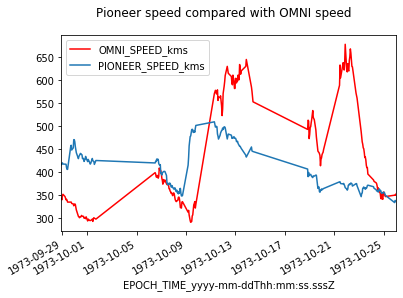

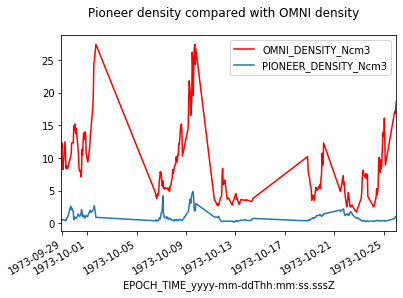

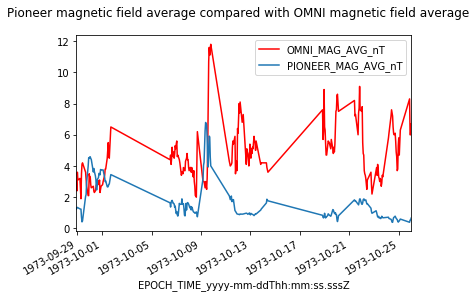

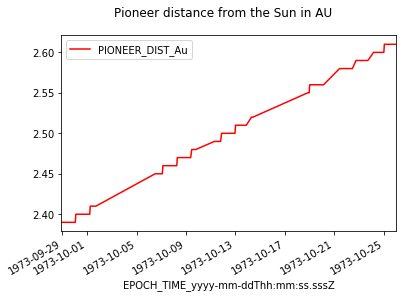

,OMNI_LAT_deg,OMNI_LONG_deg,OMNI_BR_nT,OMNI_BT_nT,OMNI_BN_nT,OMNI_MAG_AVG_nT,OMNI_SPEED_kms,OMNI_DENSITY_Ncm3,OMNI_TEMP_DegK,PIONEER_DIST_Au,PIONEER_LAT_deg,PIONEER_LONG_deg,PIONEER_BR_nT,PIONEER_BT_nT,PIONEER_BN_nT,PIONEER_MAG_AVG_nT,PIONEER_SPEED_kms,PIONEER_DENSITY_Ncm3,PIONEER_TEMP_DegK,Time_offset_hours
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.0
mean,5.988511,303.508936,0.434043,0.177872,-0.590213,4.760851,431.808511,8.505957,104698.982979,2.500553,3.227234,235.907660,0.111786,0.131159,-0.081785,1.681937,408.316170,0.969381,33694.987234,50.0
std,0.575419,8.322575,3.073548,2.738882,1.789126,1.868245,116.414019,5.606724,101163.901024,0.070117,0.165711,1.728205,0.940885,1.376747,0.972496,1.291740,47.442472,0.837779,27656.398179,0.0
min,5.000000,290.000000,-6.500000,-5.200000,-9.100000,1.900000,291.000000,1.700000,9517.000000,2.390000,3.000000,233.000000,-1.931800,-3.060200,-3.718600,0.386600,333.900000,0.134500,7912.000000,50.0
25%,5.450000,298.100000,-1.900000,-2.000000,-1.600000,3.400000,338.000000,4.300000,25844.500000,2.455000,3.100000,234.800000,-0.493500,-0.516800,-0.424000,0.863600,365.050000,0.400800,17529.000000,50.0
50%,6.100000,302.700000,-0.100000,-0.200000,-0.600000,4.500000,384.000000,7.100000,60522.000000,2.490000,3.200000,235.800000,-0.036000,0.269100,-0.042200,1.204700,398.000000,0.699000,24326.000000,50.0
75%,6.400000,311.650000,3.050000,2.250000,0.500000,5.600000,554.500000,10.750000,162951.500000,2.570000,3.400000,237.600000,0.424850,0.796550,0.248850,1.840250,445.500000,1.206500,37527.500000,50.0
max,6.800000,316.900000,7.900000,8.000000,6.400000,11.800000,678.000000,27.400000,437613.000000,2.610000,3.500000,238.600000,2.841300,5.402500,4.797400,6.786900,509.500000,4.838100,173268.000000,50.0


In [23]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Data From Pioneer 2 and OMNI 10/01/1973 to 11/01/1973")

df = pd.read_csv('csv files/Pioneer16.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.PIONEER_DIST_Au != -1.0E+31]
df = df[df.PIONEER_LAT_deg != -1.0E+31]
df = df[df.PIONEER_LONG_deg != -1.0E+31]
df = df[df.PIONEER_BR_nT != -1.0E+31]
df = df[df.PIONEER_BT_nT != -1.0E+31]
df = df[df.PIONEER_BN_nT != -1.0E+31]
df = df[df.PIONEER_MAG_AVG_nT != -1.0E+31]
df = df[df.PIONEER_SPEED_kms != -1.0E+31]
df = df[df.PIONEER_DENSITY_Ncm3 != -1.0E+31]
df = df[df.PIONEER_TEMP_DegK != -1.0E+31]

df2 = pd.read_csv('csv files/Omni4Pioneer16.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

df2 = df2[df2.OMNI_LAT_deg != -1.0E+31]
df2 = df2[df2.OMNI_LONG_deg != -1.0E+31]
df2 = df2[df2.OMNI_BR_nT != -1.0E+31]
df2 = df2[df2.OMNI_BT_nT != -1.0E+31]
df2 = df2[df2.OMNI_BN_nT != -1.0E+31]
df2 = df2[df2.OMNI_MAG_AVG_nT != -1.0E+31]
df2 = df2[df2.OMNI_SPEED_kms != -1.0E+31]
df2 = df2[df2.OMNI_DENSITY_Ncm3 != -1.0E+31]
df2 = df2[df2.OMNI_TEMP_DegK != -1.0E+31]

df['new_time'] = df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] - pd.Timedelta(hours = 50)
df['Time_offset_hours'] = 50

mF5 = pd.merge(df2, df, how='right', left_on='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', right_on='new_time')
mF5 = mF5.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

fig1 = plt.figure(1)
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF5.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_SPEED_kms', color='red', ax=ax)
mF5.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_SPEED_kms', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig2 = plt.figure(2)
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF5.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF5.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DENSITY_Ncm3', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig3 = plt.figure(3)
fig3.suptitle("Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF5.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF5.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_MAG_AVG_nT', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig4 = plt.figure(4)
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF5.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DIST_Au', color='red', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

plt.show()

mF5.describe()

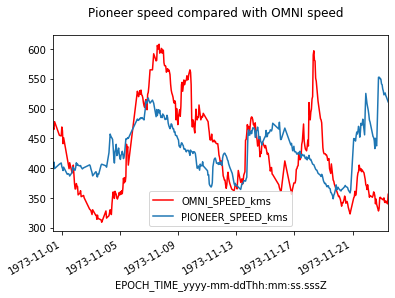

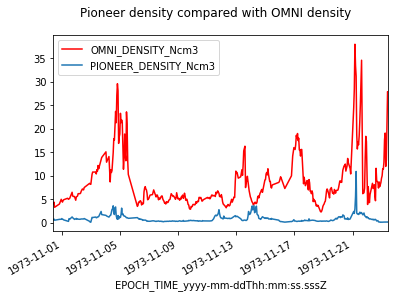

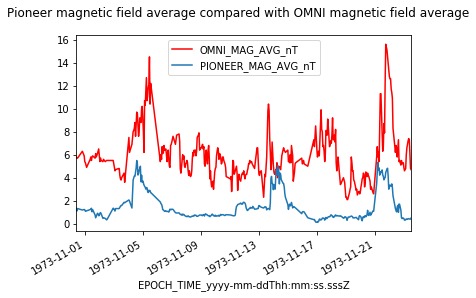

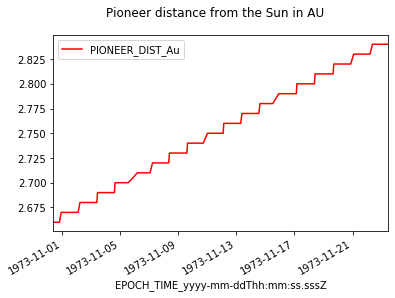

,OMNI_LAT_deg,OMNI_LONG_deg,OMNI_BR_nT,OMNI_BT_nT,OMNI_BN_nT,OMNI_MAG_AVG_nT,OMNI_SPEED_kms,OMNI_DENSITY_Ncm3,OMNI_TEMP_DegK,PIONEER_DIST_Au,PIONEER_LAT_deg,PIONEER_LONG_deg,PIONEER_BR_nT,PIONEER_BT_nT,PIONEER_BN_nT,PIONEER_MAG_AVG_nT,PIONEER_SPEED_kms,PIONEER_DENSITY_Ncm3,PIONEER_TEMP_DegK,Time_offset_hours
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.0
mean,3.120241,334.451566,-0.246265,0.295904,-0.095904,5.996386,430.836145,8.694458,110123.722892,2.758530,3.763614,241.807470,0.118975,0.003904,-0.035640,1.494393,431.491807,0.905782,40147.662651,60.0
std,0.736964,6.469978,3.581006,3.585728,2.651535,2.266808,76.470430,5.858413,65425.728946,0.051457,0.101207,1.097039,0.809921,1.369199,0.889473,1.272130,44.442595,0.874749,45897.038199,0.0
min,1.800000,322.200000,-9.800000,-8.600000,-14.800000,2.100000,309.000000,2.300000,14665.000000,2.660000,3.600000,239.700000,-3.823400,-4.196700,-4.129700,0.128300,348.400000,0.113800,4134.000000,60.0
25%,2.500000,329.450000,-3.300000,-2.200000,-1.200000,4.600000,364.000000,5.000000,55799.500000,2.720000,3.700000,241.000000,-0.292800,-0.663900,-0.262350,0.658250,400.650000,0.375700,14921.000000,60.0
50%,3.200000,334.200000,-0.600000,0.100000,0.000000,5.500000,418.000000,6.400000,97256.000000,2.760000,3.800000,241.800000,0.058100,0.244000,0.004900,1.000100,425.800000,0.666200,20824.000000,60.0
75%,3.700000,340.200000,3.000000,2.600000,1.100000,6.700000,485.000000,10.450000,149825.000000,2.800000,3.800000,242.800000,0.523450,0.581650,0.265200,1.677200,462.350000,1.106150,43382.000000,60.0
max,4.500000,345.300000,8.500000,12.000000,10.000000,15.600000,608.000000,38.000000,326088.000000,2.840000,3.900000,243.600000,3.584800,4.893900,3.728700,5.493600,552.800000,10.930900,244714.000000,60.0


In [24]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Data From Pioneer 2 and OMNI 11/01/1973 to 12/01/1973")

df = pd.read_csv('csv files/Pioneer17.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.PIONEER_DIST_Au != -1.0E+31]
df = df[df.PIONEER_LAT_deg != -1.0E+31]
df = df[df.PIONEER_LONG_deg != -1.0E+31]
df = df[df.PIONEER_BR_nT != -1.0E+31]
df = df[df.PIONEER_BT_nT != -1.0E+31]
df = df[df.PIONEER_BN_nT != -1.0E+31]
df = df[df.PIONEER_MAG_AVG_nT != -1.0E+31]
df = df[df.PIONEER_SPEED_kms != -1.0E+31]
df = df[df.PIONEER_DENSITY_Ncm3 != -1.0E+31]
df = df[df.PIONEER_TEMP_DegK != -1.0E+31]

df2 = pd.read_csv('csv files/Omni4Pioneer17.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

df2 = df2[df2.OMNI_LAT_deg != -1.0E+31]
df2 = df2[df2.OMNI_LONG_deg != -1.0E+31]
df2 = df2[df2.OMNI_BR_nT != -1.0E+31]
df2 = df2[df2.OMNI_BT_nT != -1.0E+31]
df2 = df2[df2.OMNI_BN_nT != -1.0E+31]
df2 = df2[df2.OMNI_MAG_AVG_nT != -1.0E+31]
df2 = df2[df2.OMNI_SPEED_kms != -1.0E+31]
df2 = df2[df2.OMNI_DENSITY_Ncm3 != -1.0E+31]
df2 = df2[df2.OMNI_TEMP_DegK != -1.0E+31]

df['new_time'] = df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] - pd.Timedelta(hours = 60)
df['Time_offset_hours'] = 60

mF6 = pd.merge(df2, df, how='right', left_on='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', right_on='new_time')
mF6 = mF6.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

fig1 = plt.figure(1)
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF6.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_SPEED_kms', color='red', ax=ax)
mF6.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_SPEED_kms', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig2 = plt.figure(2)
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF6.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF6.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DENSITY_Ncm3', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig3 = plt.figure(3)
fig3.suptitle("Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF6.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF6.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_MAG_AVG_nT', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig4 = plt.figure(4)
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF6.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DIST_Au', color='red', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

plt.show()

mF6.describe()

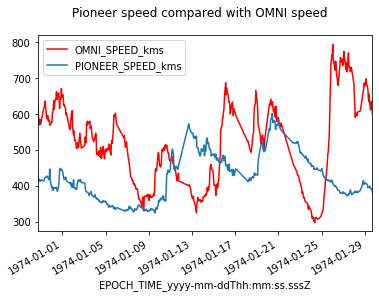

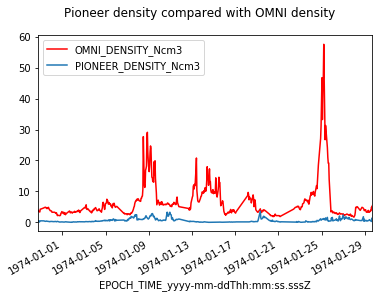

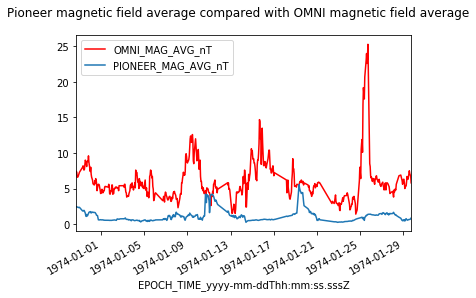

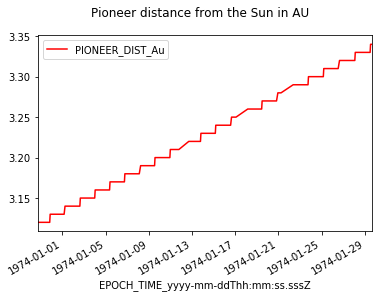

,OMNI_LAT_deg,OMNI_LONG_deg,OMNI_BR_nT,OMNI_BT_nT,OMNI_BN_nT,OMNI_MAG_AVG_nT,OMNI_SPEED_kms,OMNI_DENSITY_Ncm3,OMNI_TEMP_DegK,PIONEER_DIST_Au,PIONEER_LAT_deg,PIONEER_LONG_deg,PIONEER_BR_nT,PIONEER_BT_nT,PIONEER_BN_nT,PIONEER_MAG_AVG_nT,PIONEER_SPEED_kms,PIONEER_DENSITY_Ncm3,PIONEER_TEMP_DegK,Time_offset_hours
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.0
mean,-4.322778,37.023333,-1.251111,0.896111,0.195556,6.096111,514.733333,6.847963,189066.037037,3.223167,4.494074,250.742963,0.083515,0.249492,0.032751,1.119987,422.902778,0.649083,41164.707407,55.0
std,0.914316,9.175941,3.902111,3.460410,2.404020,3.028915,118.553993,6.600619,124991.852435,0.064086,0.080133,1.119687,0.667917,1.010052,0.557768,0.889520,67.088967,0.638984,46099.925876,0.0
min,-5.800000,21.900000,-13.000000,-8.100000,-12.600000,1.400000,298.000000,1.700000,9266.000000,3.120000,4.400000,248.900000,-2.845700,-3.985100,-3.495300,0.245700,323.900000,0.039400,635.000000,55.0
25%,-5.100000,28.900000,-3.700000,-1.200000,-1.025000,4.400000,405.000000,3.300000,85760.000000,3.170000,4.400000,249.800000,-0.332475,-0.212075,-0.185375,0.553350,371.050000,0.181150,10047.750000,55.0
50%,-4.350000,36.700000,-2.100000,1.300000,0.100000,5.500000,512.000000,4.800000,172405.000000,3.220000,4.500000,250.700000,0.176300,0.288000,-0.042050,0.838300,414.550000,0.415750,18130.500000,55.0
75%,-3.500000,44.600000,1.000000,2.700000,1.425000,6.900000,605.000000,7.425000,267459.000000,3.280000,4.600000,251.700000,0.464500,0.587775,0.222200,1.340650,469.225000,0.920750,60897.000000,55.0
max,-2.700000,53.400000,11.000000,19.900000,10.800000,25.300000,794.000000,57.500000,861728.000000,3.340000,4.600000,252.700000,3.203600,4.275800,2.609100,5.557100,600.700000,3.643100,247928.000000,55.0


In [27]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Data From Pioneer 2 and OMNI 01/01/1974 to 02/01/1974")

df = pd.read_csv('csv files/Pioneer18.csv')
df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

df = df[df.PIONEER_DIST_Au != -1.0E+31]
df = df[df.PIONEER_LAT_deg != -1.0E+31]
df = df[df.PIONEER_LONG_deg != -1.0E+31]
df = df[df.PIONEER_BR_nT != -1.0E+31]
df = df[df.PIONEER_BT_nT != -1.0E+31]
df = df[df.PIONEER_BN_nT != -1.0E+31]
df = df[df.PIONEER_MAG_AVG_nT != -1.0E+31]
df = df[df.PIONEER_SPEED_kms != -1.0E+31]
df = df[df.PIONEER_DENSITY_Ncm3 != -1.0E+31]
df = df[df.PIONEER_TEMP_DegK != -1.0E+31]

df2 = pd.read_csv('csv files/Omni4Pioneer18.csv')
df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

df2 = df2[df2.OMNI_LAT_deg != -1.0E+31]
df2 = df2[df2.OMNI_LONG_deg != -1.0E+31]
df2 = df2[df2.OMNI_BR_nT != -1.0E+31]
df2 = df2[df2.OMNI_BT_nT != -1.0E+31]
df2 = df2[df2.OMNI_BN_nT != -1.0E+31]
df2 = df2[df2.OMNI_MAG_AVG_nT != -1.0E+31]
df2 = df2[df2.OMNI_SPEED_kms != -1.0E+31]
df2 = df2[df2.OMNI_DENSITY_Ncm3 != -1.0E+31]
df2 = df2[df2.OMNI_TEMP_DegK != -1.0E+31]

df['new_time'] = df['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] - pd.Timedelta(hours = 55)
df['Time_offset_hours'] = 55

mF7 = pd.merge(df2, df, how='right', left_on='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', right_on='new_time')
mF7 = mF7.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

fig1 = plt.figure(1)
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF7.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_SPEED_kms', color='red', ax=ax)
mF7.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_SPEED_kms', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig2 = plt.figure(2)
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF7.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF7.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DENSITY_Ncm3', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig3 = plt.figure(3)
fig3.suptitle("Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF7.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF7.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_MAG_AVG_nT', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig4 = plt.figure(4)
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF7.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DIST_Au', color='red', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

plt.show()

mF7.describe()

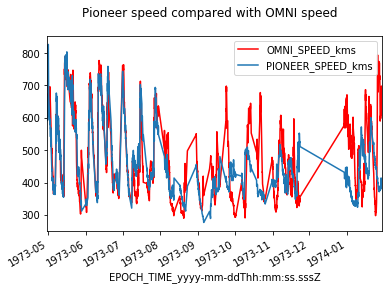

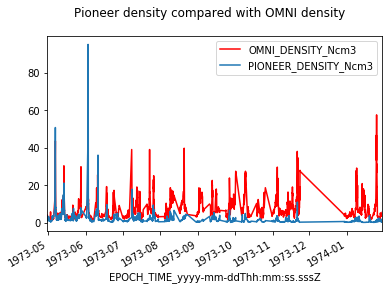

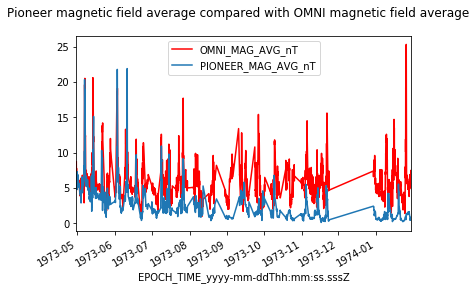

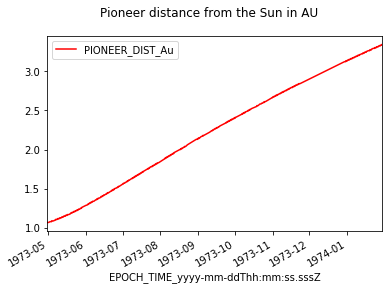

In [29]:
mF0 = mF0.append(mF1)
mF0 = mF0.append(mF2)
mF0 = mF0.append(mF3)
mF0 = mF0.append(mF4)
mF0 = mF0.append(mF5)
mF0 = mF0.append(mF6)
mF0 = mF0.append(mF7)

fig1 = plt.figure(1)
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_SPEED_kms', color='red', ax=ax)
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_SPEED_kms', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig2 = plt.figure(2)
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DENSITY_Ncm3', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig3 = plt.figure(3)
fig3.suptitle("Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_MAG_AVG_nT', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

fig4 = plt.figure(4)
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF0.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='PIONEER_DIST_Au', color='red', ax=ax)
#ax.set_xlim([datetime.date(1972, 11, 1), datetime.date(1972, 12, 1)])

plt.show()

mF0.describe()

mF0.to_csv('Pioneer3.csv')
